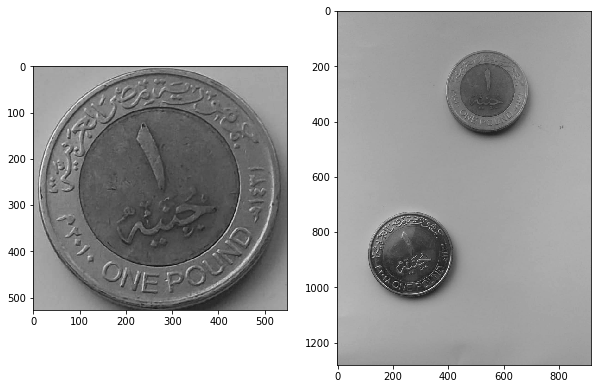

In [1]:
import cv2
from matplotlib import pyplot as plt

MIN_MATCH_COUNT = 10

img1 = cv2.imread('21.jpeg', 0)  # queryImage
img2 = cv2.imread('26.jpeg', 0) # trainImage

plt.figure(figsize=(10,10))



plt.subplot(1,2,1)
plt.imshow(img1,"gray")

plt.subplot(1,2,2)
plt.imshow(img2,"gray")

In [2]:
print("img1 shape => ",img1.shape)
print("------------------------------")
print("img2 shape => ",img2.shape)

img1 shape =>  (526, 548)
------------------------------
img2 shape =>  (1280, 917)


In [3]:
#sift =cv.xfeatures2d.SIFT_create ( nfeatures =0, nOctaveLayers=3, contrastThreshold=0.04 , edgeThreshold=10 , sigma =1.6)
sift = cv2.xfeatures2d.SIFT_create(nfeatures=10000,sigma=0.6, nOctaveLayers=6, edgeThreshold = 10)

In [4]:
#keypoints, descriptors=cv.Feature2D.detectAndCompute(image, mask, descriptors, useProvidedKeypoints)
#Masks for each input image specifying where to look for keypoints (optional). masks[i] is a mask for images[i].

kp1, dp1 = sift.detectAndCompute(img1, None)
kp2, dp2 = sift.detectAndCompute(img2, None)
print("Descriptor img1 = \n",dp1)
print("Descriptor shape  img1 => ",dp1.shape)
print("----------------------------------------------")
print("Descriptor img2 = \n",dp2)
print("Descriptor shape img2 => ",dp2.shape)

Descriptor img1 = 
 [[ 99.  30.   0. ...   0.   0.   0.]
 [114.  17.   0. ...   1.   6.   1.]
 [ 60.   6.   0. ...   0.   1.   6.]
 ...
 [ 12.   0.   0. ...   0.   0.   4.]
 [  0.   0.   0. ...   0.   0.   4.]
 [  0.   0.   0. ...   0.   0.   2.]]
Descriptor shape  img1 =>  (4602, 128)
----------------------------------------------
Descriptor img2 = 
 [[160.  28.   0. ...   1.   1.   1.]
 [146.  28.   0. ...   0.   0.   3.]
 [124.  16.   0. ...   6.   3.   0.]
 ...
 [ 36.  20.   1. ...   0.   2.  11.]
 [ 10.  32.  25. ...   0.   0.   2.]
 [  1.   1.  14. ...  63.  37.  40.]]
Descriptor shape img2 =>  (4863, 128)


In [5]:
print(len(kp1))
print(len(kp2))
kp2[0].pt

4602
4863


(109.58544158935547, 874.51416015625)

In [6]:
import numpy as np

x = np.array([kp2[0].pt])

print("the first keypoint in image2 = ",x)
print("x shape =  ",x.shape)

the first keypoint in image2 =  [[109.58544159 874.51416016]]
x shape =   (1, 2)


In [7]:
for i in range(len(kp2)):
    x = np.append(x, [kp2[i].pt], axis=0)
x = x[1:len(x)]

print("The coordinate all keypoints in image2 => \n",x)
print("x shape =  ",x.shape)

The coordinate all keypoints in image2 => 
 [[109.58544159 874.51416016]
 [111.30262756 900.46142578]
 [112.89169312 856.78387451]
 ...
 [809.89202881 423.30456543]
 [809.89202881 423.30456543]
 [811.8170166  422.88589478]]
x shape =   (4863, 2)


In [8]:
from sklearn.cluster import MeanShift
ms = MeanShift()
ms.fit(x)
# 1- ( labels_ )
labels = ms.labels_  #Labels of each point
print("labels = " ,labels) 
print("-----------------------------")
print("Number of labels = ",len(labels)) # equal to the numbers of keypoints

labels =  [0 0 0 ... 1 1 1]
-----------------------------
Number of labels =  4863


In [9]:
labels_unique = np.unique(labels)
print(labels_unique)

[0 1]


In [10]:
n_clusters_ = len(labels_unique)
print("Number of clusters : " , n_clusters_)

Number of clusters :  2


In [11]:
# 2- ( cluster_centers_ )
cluster_centers = ms.cluster_centers_
print("The coordinate of each cluster centers => \n",cluster_centers)

The coordinate of each cluster centers => 
 [[258.68612189 879.46598092]
 [535.26197201 299.51280049]]


In [12]:
#create empty list according to num of clusters
s = [None] * n_clusters_
print(s)

[None, None]


In [13]:
# put keypoints in [s]
for i in range(n_clusters_):
    print("i=",i)
    l = ms.labels_
    print("l=",l)
    # numpy.where(condition[, x, y]) 
    # condition : When True, yield x, otherwise yield y.
    d, = np.where(l == i) #condition = True when l=i
    print("Num of labels at cluster %d = "  % i,len(d))
    s[i] = list(kp2[xx] for xx in d)

i= 0
l= [0 0 0 ... 1 1 1]
Num of labels at cluster 0 =  3218
i= 1
l= [0 0 0 ... 1 1 1]
Num of labels at cluster 1 =  1645


In [14]:
dp2_ = dp2
print(dp2_)
print(dp2_.shape)

[[160.  28.   0. ...   1.   1.   1.]
 [146.  28.   0. ...   0.   0.   3.]
 [124.  16.   0. ...   6.   3.   0.]
 ...
 [ 36.  20.   1. ...   0.   2.  11.]
 [ 10.  32.  25. ...   0.   0.   2.]
 [  1.   1.  14. ...  63.  37.  40.]]
(4863, 128)


cluster number =   0
dp2 [0] =  (3218, 128)
------------------------------
number ot outliers =  83
------------------------------
number ot inliers =  50


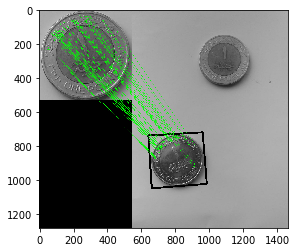

cluster number =   1
dp2 [1] =  (1645, 128)
------------------------------
number ot outliers =  171
------------------------------
number ot inliers =  84


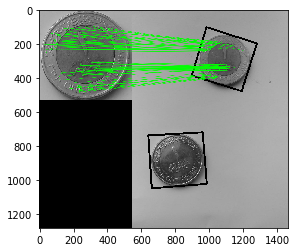

In [15]:
for i in range(n_clusters_):

    kp2 = s[i]
    l = ms.labels_
    d, = np.where(l == i)
    dp2 = dp2_[d, ]
    print("cluster number =  ",i)
    print("dp2 [%d] = "%(i),dp2.shape)
    # FLANN MATCHING
    FLANN_INDEX_KDTREE = 0
    index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
    search_params = dict(checks = 50)

    flann = cv2.FlannBasedMatcher(index_params, search_params)

    dp1 = np.float32(dp1)
    dp2 = np.float32(dp2)

    matches = flann.knnMatch(dp1, dp2, 2)

    # store all the good matches
    good = []
    for m,n in matches:
        if m.distance < 0.8*n.distance:
            good.append(m)

    if len(good)>3:
        src_pts = np.float32([ kp1[m.queryIdx].pt for m in good ]).reshape(-1,1,2)
        dst_pts = np.float32([ kp2[m.trainIdx].pt for m in good ]).reshape(-1,1,2)

        M, mask = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC, 2)

        if M is None:
            print ("No Homography")
        else:
            matchesMask = mask.ravel().tolist()
            print("------------------------------")
            print("number ot outliers = ", matchesMask.count(0))
            print("------------------------------")
            print("number ot inliers = ", matchesMask.count(1))

            h,w = img1.shape
            pts = np.float32([ [0,0],[0,h-1],[w-1,h-1],[w-1,0] ]).reshape(-1,1,2)
            dst = cv2.perspectiveTransform(pts,M)
            #cv.PolyLine(img, polys, is_closed, color, thickness=1, lineType=8, shift=0)
            img2 = cv2.polylines(img2,[np.int32(dst)],True,(0,255,0),9)

            draw_params = dict(matchColor=(0, 255, 0),  # draw matches in green color
                               matchesMask=matchesMask,  # draw only inliers
                               flags=2)
            
            #cv.drawMatches(img1, keypoints1, img2, keypoints2, matches1to2, outImg[, matchColor[, singlePointColor[, matchesMask[, flags]]]]
            img3 = cv2.drawMatches(img1, kp1, img2, kp2, good, None, **draw_params)

            plt.imshow(img3, 'gray'), plt.show()

    else:
        print ("Not enough matches are found - %d/%d" % (len(good),MIN_MATCH_COUNT))
        matchesMask = None

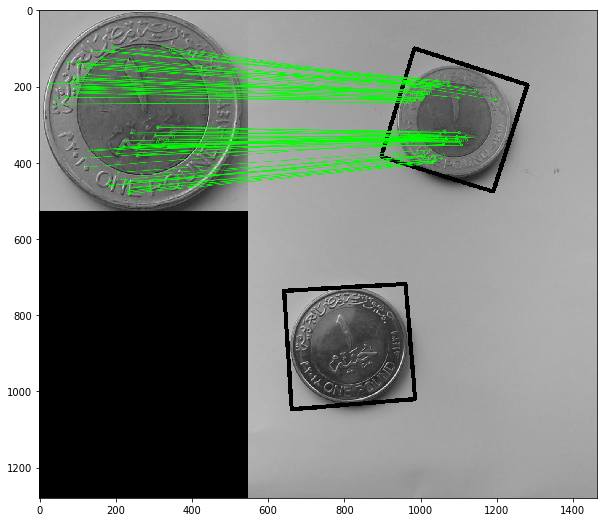

In [16]:
plt.figure(figsize=(10,10))

plt.imshow(img3, 'gray')